# Jamboree Education - Linear Regression

## Context
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Business Problem
We need to help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## EDA

Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [234]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [235]:
df = pd.read_csv("/Users/mojo/ML/Scaler/Projects/Jamboree-LR/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Note: We can see that serial number doesn't provide any insigts this is why we are getting rid of it

In [236]:
df = df.iloc[:,1:]

In [237]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [238]:
# Shape of Data
df.shape

(500, 8)

- We can see we have 500 records of 8 parameters
- Since we have small data, I don't think that it a good 

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Statistical Analysis

In [240]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [241]:
# covnert categorical data,
# shape
# split train and test

### Changing Reaserch into Categorical type

In [242]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

target = 'Chance of Admit '

In [243]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [244]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GRE Score,500.0,NaN,NaN,NaN,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,NaN,NaN,NaN,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,5.0,3.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOP,500.0,9.0,4.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOR,500.0,9.0,3.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,500.0,NaN,NaN,NaN,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,2.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,500.0,NaN,NaN,NaN,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Statistical Analysis:
- We have 4 categorical data and 4 numerical.
- GRE Score: range: 290 - 340, data is not skewed
- TOEFL Score : range: 92-120 data is not skewed
- CGPA: range: 1-10, data is not skewed
- Chance of Admit: ranges from 34% to 94%, data is not skewed

-  Looking at the data it seems that there are not outliers in the data. We will further investigagte this during univarite data. 


### Missing Value detection

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [246]:
df.duplicated().sum()

0

In [247]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- Looking at the results above we can colclude that the data doesn't contain any missing values.
- There is no duplicate data either. 

### Univariate Analysis
- We have 4 numerical variables and 4 categorical.

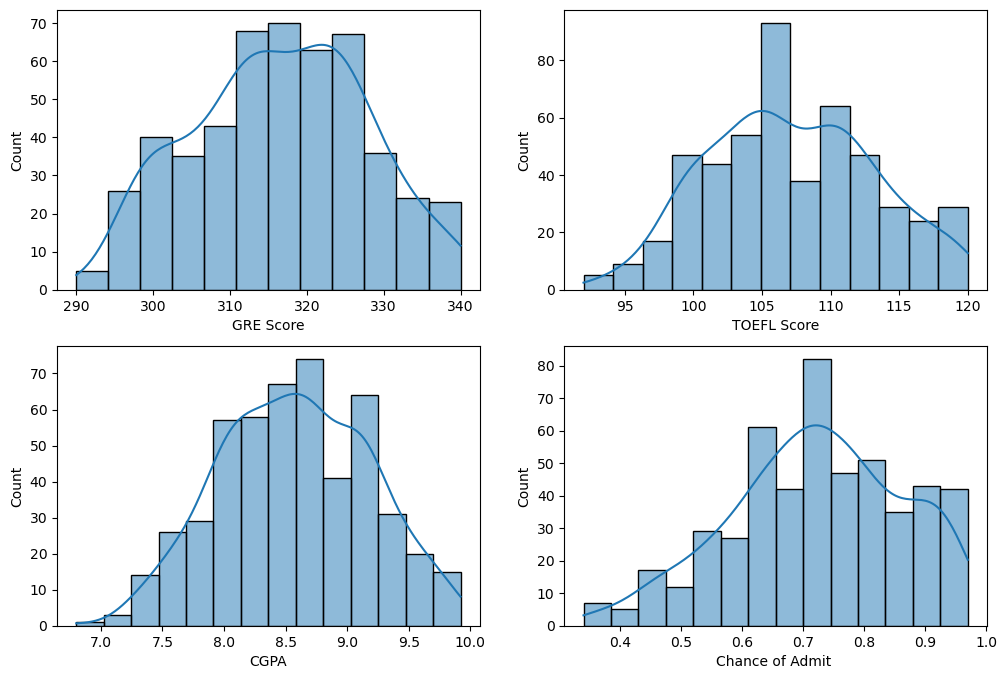

In [248]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break
        
sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target], kde=True, ax=axs[1,1])
plt.show()

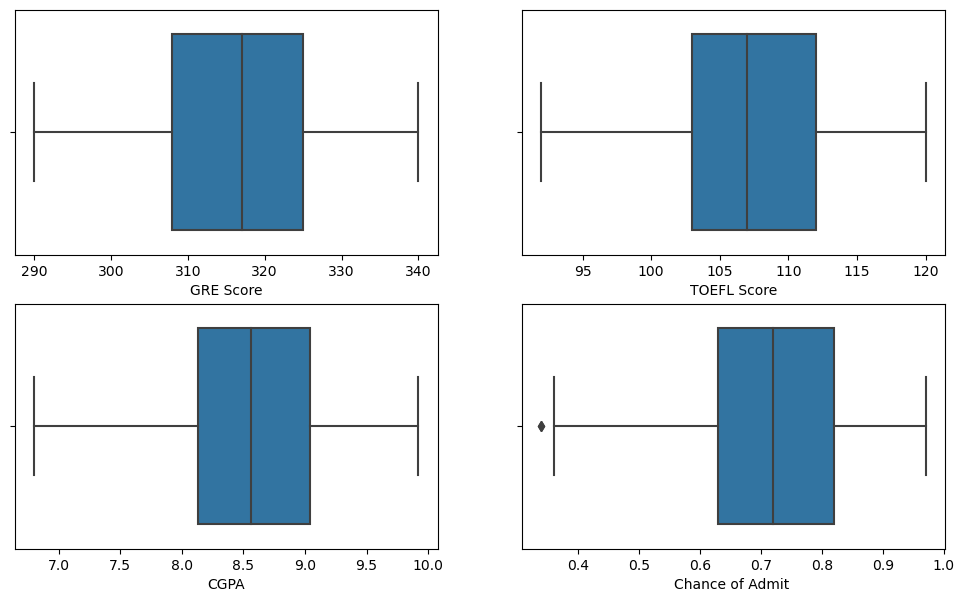

In [249]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1
    
sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()

Looking at the box plot we can infer:
- There are no outliers in  data with some exceptions in "Chance of Admit".
- We can also notice that there are no skewness in the data.
- Most of the data is centered aroung Mean. 

In [250]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  LOR                  Unique values: 9
Column:  Research             Unique values: 2


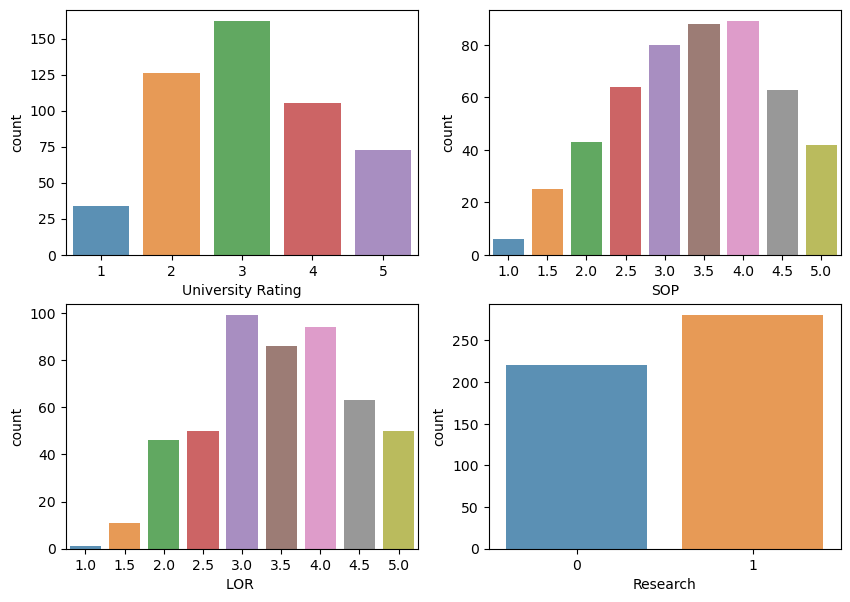

In [251]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1
        
plt.show()

### Bi-variate Analysis

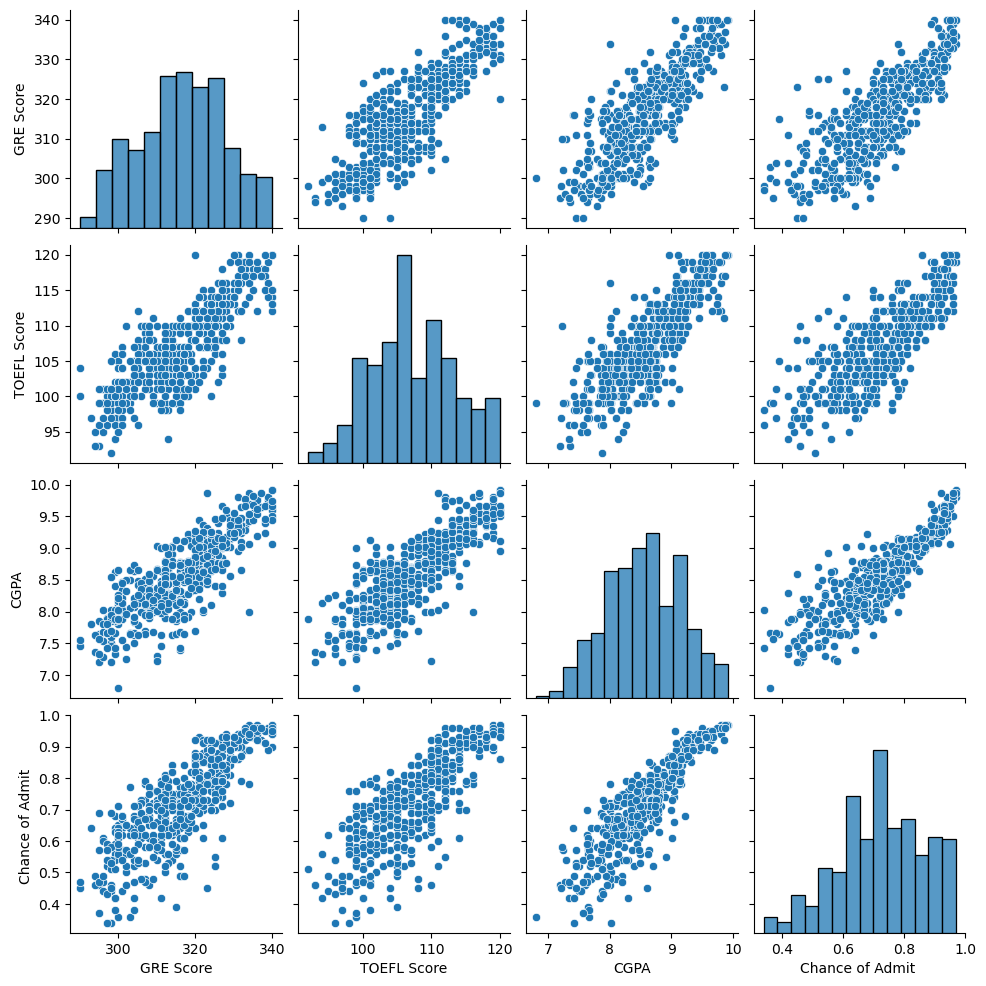

In [252]:
sns.pairplot(data= df);

- We can notice that there is a linear relationship in all of the numerical variables.
- Higher is the GRE, TOEFL and CGPA higher the chances of addmission.

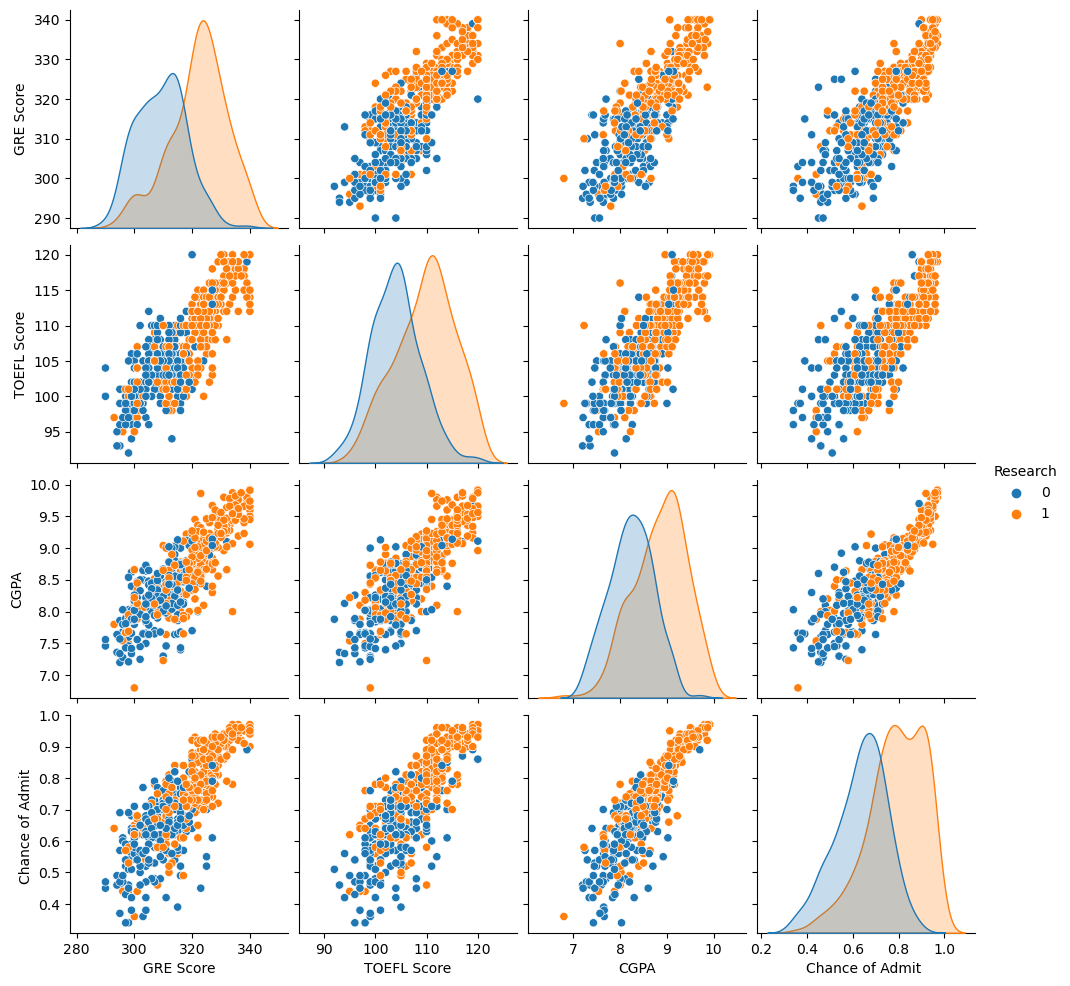

In [253]:
sns.pairplot(df,hue='Research');

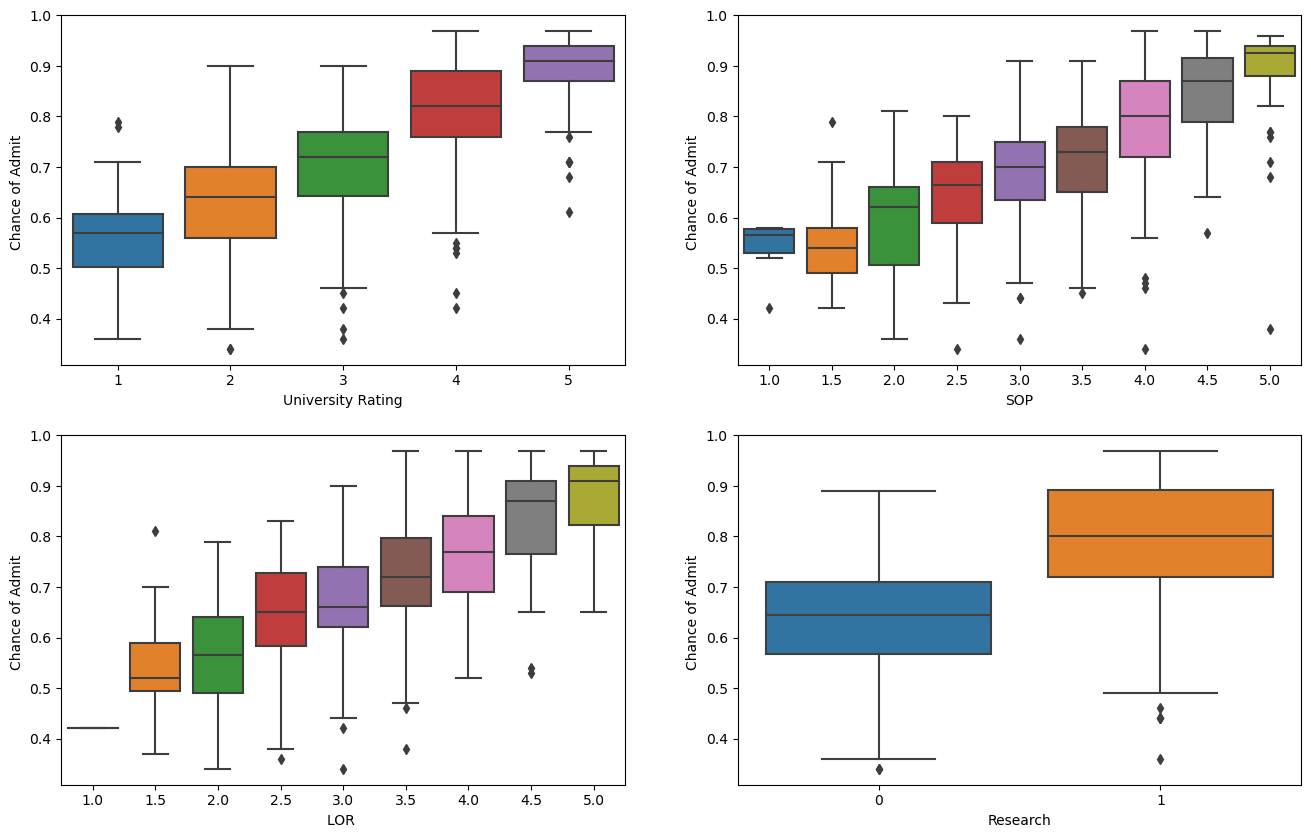

In [254]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

- We can see there are very few outliers in the data.
- Which shows that with avg LOR, Higher university rating chance of admission are affected too. 
- 

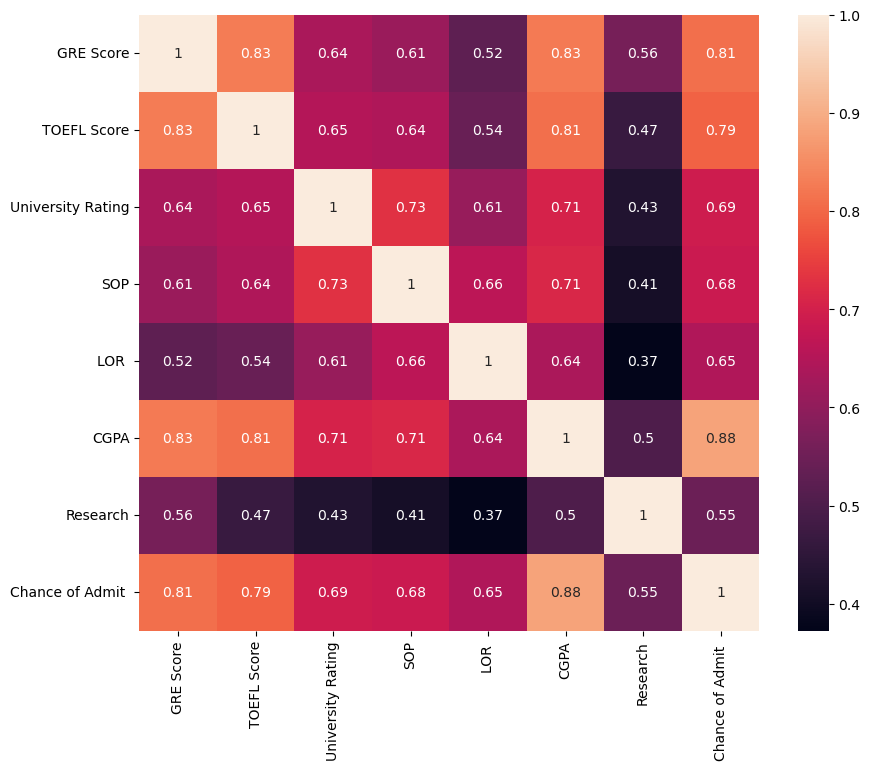

In [255]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

- Looking at the corelation
- CGPA is most propotional to the chances of admission followed by GRE, TOFEL an University Rating.
- Research is the lease affected factor here.
- 

## Data Preprocessing
- We have already confirmed that there are no missing values, outliers and duplicates present in the dataset.

In [256]:
X = df.drop(columns=[target])
y = df[target]

# Standerdizing data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


## Model building

In [257]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)
        
    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [258]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha,)
    else:
        model = LinearRegression(n_jobs=-1)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [259]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.724978121476996
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4               LOR   0.012497
5               CGPA  0.064671
6           Research  0.013968
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7249823645841696
              Column      Coef
0          GRE Score  0.018902
1        TOEFL Score  0.023252
2  University Rating  0.011594
3                SOP -0.000798
4               LOR   0.012539
5               CGPA  0.064004
6           Research  0.013990
-------------

Lasso(alpha=0.001)

- Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.
- R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.

## Linear Regression Model - Assumption Test¶

### Multicollinearity check by VIF score

In [260]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [261]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i) for i in range(len(newdf.columns))]
    return vif_data

In [262]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


- gre score is the score with highest vif, we will try to remove it and calculate vif again

In [263]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


- TOEFL score is the score with highest vif, we will try to remove it and calculate vif again

In [264]:
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [265]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [266]:
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [267]:
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [268]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

In [269]:
model = train_model(X_train1, y_train1, X_test1, y_test1, ['CGPA', 'Research'], "linear")
train_model(X_train1, y_train1, X_test1, y_test1, ['CGPA', 'Research'], "ridge")
train_model(X_train1, y_train1, X_test1, y_test1, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247830300095277
     Column      Coef
0      CGPA  0.111630
1  Research  0.020362
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247713356661623
     Column      Coef
0      CGPA  0.111344
1  Research  0.019571
---------------------------------------

Lasso(alpha=0.001)

- We have tried modeling with CGPA and research. We sitll get the same r2 score and adjusted r2 score. 
- We have used variance inflation factor to remove features.

#### The mean of residuals is nearly zero
- It's evident that RMSE that Mean of Residuals is almost zero.

#### Linearity of variables (no pattern in the residual plot)
- We have seen in pair plots that variables are Linear

#### Test for Homoscedasticity

In [270]:

X_train2 = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train2).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.27e-123
Time:                        15:32:24   Log-Likelihood:                 500.20
No. Observations:                 350   AIC:                            -984.4
Df Residuals:                     342   BIC:                            -953.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.003    230.864      0.000       0.719       0.731
x1             0.0187      0.007      2.798      0.005       0.006       0.032
x2             0.0232      0.006      3.653      0.000       0.011       0.036
x3             0.0116      0.005      2.116      0.035       0.001       0.022
x4            -0.0010      0.005     -0.189      0.850      -0.011       0.009
x5             0.0125      0.004      2.849      0.005       0.004       0.021
x6             0.0647      0.007      9.356      0.000       0.051       0.078
x7             0.0140      0.004      3.613      0.000       0.006       0.022
==============================================================================
Omnibus:                       77.752   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.766
Skew:                          -1.100   Prob(JB):                     9.21e-40
Kurtosis:                       5.736   Cond. No.                         5.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

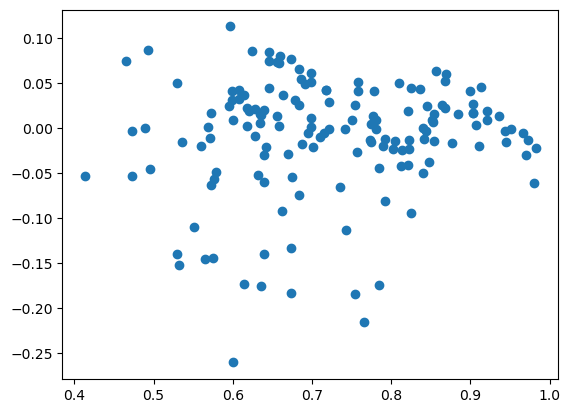

In [276]:
y_pred = model.predict(X_test1)
residuals = (y_test1 - y_pred)
plt.scatter(y_pred, residuals)
plt.show()

- We can see that the erros are distributed. 
- There is no pointy shape which shows that there is no Homoscedasticity

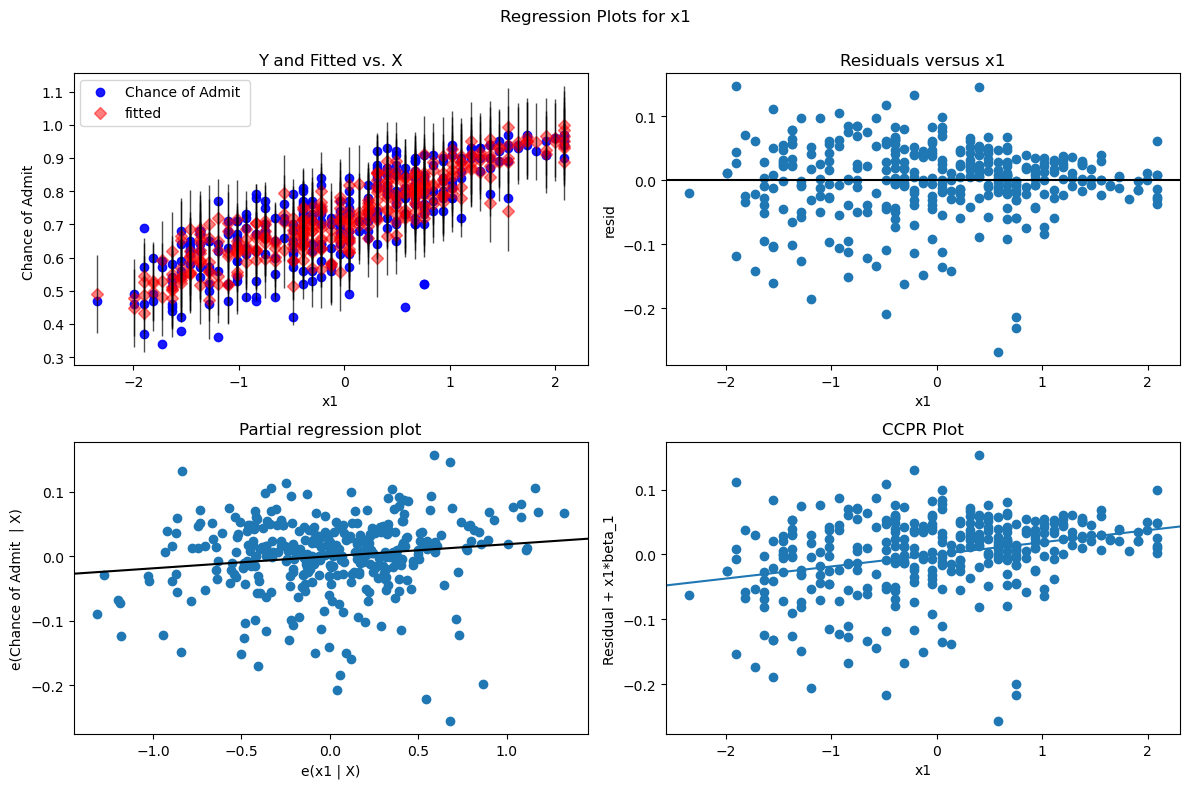

In [271]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lr, 'x1', fig=fig)


- We can see that the points are plotted randomly spread or scattered. points or residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.
- With the predictor variable ‘area’ there’s no heteroscedasticity.

#### Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

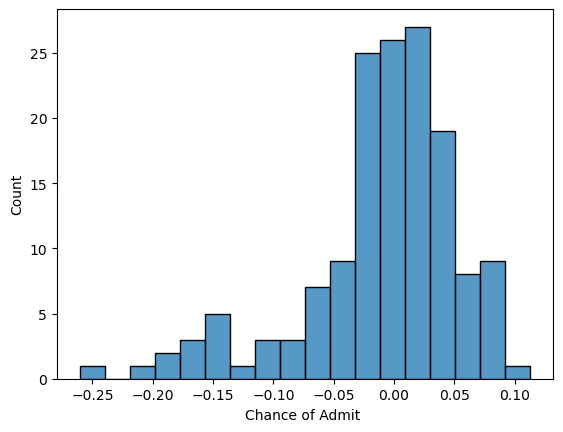

In [273]:
sns.histplot(residuals)
plt.show()

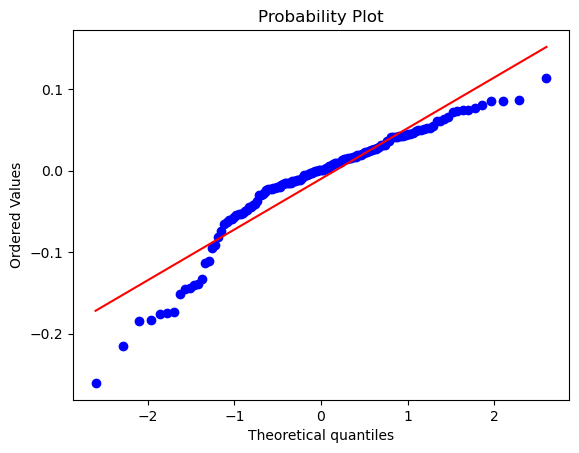

In [274]:
stats.probplot(residuals, plot=plt)
plt.show()

### Insights

- Multicollinearity is present in the data.
- After removing collinear features there are only two variables which are important in making predictions for the target variables.
- Indepedent variables are linearly correlated with dependent variables.

- Based on the analysis we donot have outliers for independent features like 'GRE Score', 'TOEFL Score' & 'CGPA'.
- 'Chance of Admit' is slightly left screwed. Since 'Chance of Admit' is a slightly left skewed, we don't have to handle it.
- Among students who have done research vs those who did not, 56 % said Yes and 44 % said No
- More than 50% of the data has a university rating of 3 or 2
- A majority of students (56%) have letter of recommendation values between 3.0 and 4.5
- A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
- GRE Score , TOFEL Score and CGPA are highly correlated (0.80). We should drop two of these.
- Based on the analysis an upward trend for each categorical variable. A higher rating or value increases the chance of admission


### Recommendation

- Note - We found that TOEFL and CGPA are highly correlated with GRE scores, hence these variables can also be used in exchange for GRE scores.
- Graduation Admission - Can use the above model to create new feature where students/learners can come to their website and check their probability of getting into the IVY league college.
- Key features which influence the chance of Admit are

- GRE Score
- TOEFL Score
- CGPA
- LOR greater or equal to than 4.5
- A higher University rating will increases the chance of admission
- A higher value of LOR and SPO will also increases the chance of admission for the student.
